In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pneumonia_predictor.backend.data_fetcher import load_data
from pneumonia_predictor.backend.rf_active_smote import RfActiveSMOTE
from pneumonia_predictor.backend.rf_smote import RfSMOTE
from pneumonia_predictor.backend.tester import ModelTester

In [2]:
X_train, y_train, X_test, y_test = (
    load_data("X_train"),
    load_data("y_train"),
    load_data("X_test"),
    load_data("y_test"),
)

In [3]:
rf_smote = RfSMOTE(X_train, y_train, X_test, y_test, "pneumonia_admission")
rf_active_smote = RfActiveSMOTE(X_train, y_train, X_test, y_test, "pneumonia_admission")

In [4]:
tester = ModelTester(rf_smote, rf_active_smote)

In [5]:
tester.run_tests(10)

In [6]:
tester.model_a_res

,Test,accuracy,precision,recall,f1-score,Average
0,1,0.528333,0.556222,0.528333,0.539610,0.538125
1,2,0.513333,0.565920,0.513333,0.529730,0.530579
2,3,0.506667,0.567772,0.506667,0.523796,0.526225
3,4,0.496667,0.562678,0.496667,0.514189,0.517550
4,5,0.500000,0.567222,0.500000,0.517390,0.521153
5,6,0.501667,0.569503,0.501667,0.518986,0.522956
6,7,0.490000,0.560840,0.490000,0.507620,0.512115
7,8,0.490000,0.562057,0.490000,0.507558,0.512404
8,9,0.490000,0.560840,0.490000,0.507620,0.512115
9,10,0.491667,0.564355,0.491667,0.509133,0.514205


In [7]:
tester.model_b_res

,Test,accuracy,precision,recall,f1-score,Average
0,1,0.552333,0.568079,0.552333,0.557913,0.557665
1,2,0.527667,0.573547,0.527667,0.542816,0.542924
2,3,0.514000,0.573560,0.514000,0.530804,0.533091
3,4,0.496667,0.567283,0.496667,0.514030,0.518662
4,5,0.488000,0.562724,0.488000,0.505446,0.511043
5,6,0.481667,0.561796,0.481667,0.498798,0.505982
6,7,0.484667,0.565021,0.484667,0.501688,0.509010
7,8,0.477667,0.561126,0.477667,0.494471,0.502733
8,9,0.473333,0.558743,0.473333,0.489968,0.498844
9,10,0.466333,0.554242,0.466333,0.482710,0.492404


In [8]:
tester.compare_res

,Metrics,t-value,p-value
0,accuracy,0.916396,0.383358
1,precision,-0.389368,0.706057
2,recall,0.916396,0.383358
3,f1-score,1.209827,0.257163


## Feature importance (mean decrease in impurity - MDI)

In [9]:
feature_names = [
    "age",
    "sex",
    "chronic_respiratory_disease",
    "diabetes_mellitus",
    "heart_failure",
    "cancer",
    "chronic_kidney_disease",
]

### RfSMOTE

In [10]:
start_time = time.time()
importances = rf_smote.classifier.feature_importances_
rf_smote_std = np.std(
    [tree.feature_importances_ for tree in rf_smote.classifier.estimators_], axis=0
)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.023 seconds


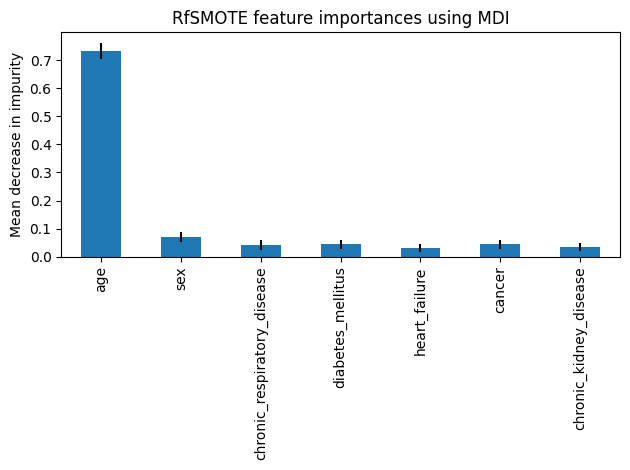

In [11]:
rf_smote_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
rf_smote_importances.plot.bar(yerr=rf_smote_std, ax=ax)
ax.set_title("RfSMOTE feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### RfActiveSMOTE

In [12]:
start_time = time.time()
importances = rf_active_smote.classifier.feature_importances_
rf_active_smote_std = np.std(
    [tree.feature_importances_ for tree in rf_active_smote.classifier.estimators_],
    axis=0,
)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.024 seconds


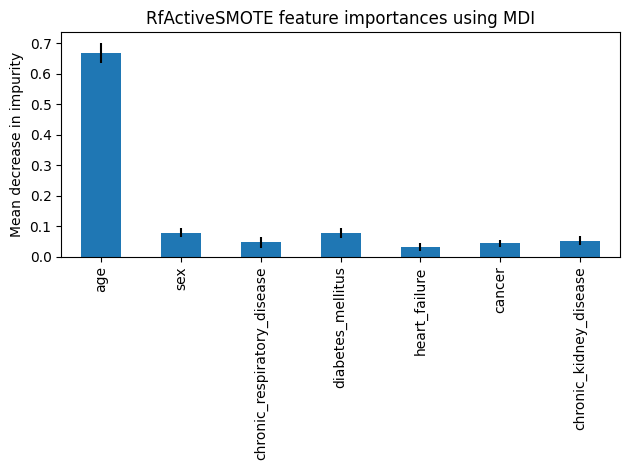

In [13]:
rf_active_smote_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
rf_active_smote_importances.plot.bar(yerr=rf_active_smote_std, ax=ax)
ax.set_title("RfActiveSMOTE feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()